# <center> Proyecto Barcelona - Comunas de Medellin

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tanglegram as tg
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("../../../") 
from utils.paths import make_dir_line

from dataquality import data_quality
from datacleaning import data_cleaning
from datatransform import convert_label
from datavisualizate import heatmap_groups

modality = 'p'
project = 'barcelona'
data = make_dir_line(modality, project)

raw = data('raw')

# AIMS

Variables to use: x3 to x15 <br>
Variable to predict: x1

In [5]:
df = pd.read_csv(raw / 'info_comunas_med.csv', sep = ',', decimal = '.', header = 0)
##
## Apply data cleaning
##
df = data_cleaning(df)
##
## Evaluate data Quality
##
data_quality(df)
df = convert_label(df, 'x2')
df.head()

*****
The dataframe does not contain missing values.
*****
The dataframe does not contain duplicate values.
*****
The dataframe contains values that are not numeric.
Variable not numerit: x2
*****
The dimension of dataframe is (16, 15)
execution data quality ends.


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,1,11,1,1960,2.300,122067,0.782,30.90,42.50,21.5,4.90,80.4,11.3,0.3,21
1,2,14,1,1950,2.210,103212,0.803,31.10,42.90,21.0,4.90,87.6,12.3,0.1,11
2,3,9,1,1940,5.495,148762,0.802,31.10,42.90,21.0,4.80,87.7,12.0,0.3,19
3,4,0,1,1950,4.872,135167,0.839,31.00,42.90,21.0,4.90,89.8,10.1,0.1,14
4,5,3,2,1930,6.100,142867,0.861,16.79,36.43,37.9,8.86,98.0,1.0,1.0,15


In [6]:
##
## Describe data
##
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,8.500000,7.500000,3.000000,1919.812500,6.909706,151681.75000,0.859062,26.430625,42.014375,25.275000,6.053750,94.106667,4.833333,0.560000,16.75000
std,4.760952,4.760952,1.712698,68.018839,4.753023,77201.73095,0.055837,4.168190,1.866576,4.344882,1.372914,5.288915,4.438118,0.985765,4.78191
min,1.000000,0.000000,1.000000,1675.000000,2.210000,84266.00000,0.782000,16.790000,36.430000,21.000000,4.100000,80.400000,0.000000,0.000000,7.00000
25%,4.750000,3.750000,1.750000,1930.000000,4.626500,114363.75000,0.814500,23.800000,41.775000,21.400000,4.900000,92.125000,0.875000,0.100000,13.75000
50%,8.500000,7.500000,3.000000,1938.000000,6.031500,133838.00000,0.847000,25.500000,42.300000,25.700000,5.900000,95.650000,4.250000,0.100000,17.00000
75%,12.250000,11.250000,4.000000,1950.000000,7.475000,161991.00000,0.893750,30.450000,42.900000,27.350000,7.000000,97.250000,7.775000,0.365000,19.50000
max,16.000000,15.000000,6.000000,1960.000000,23.000000,410671.00000,0.979000,31.100000,44.400000,37.900000,8.860000,100.000000,12.300000,3.000000,25.00000


## Analisis por similitud 

### Kmeans

In [7]:
##
## Choose data
##
y = df['x1']
X = df.copy()
X.drop(['x1', 'x2'], axis = 1, inplace = True)

In [8]:
##
## Scale data
##
scaler = StandardScaler()
X_esc = scaler.fit_transform(X)

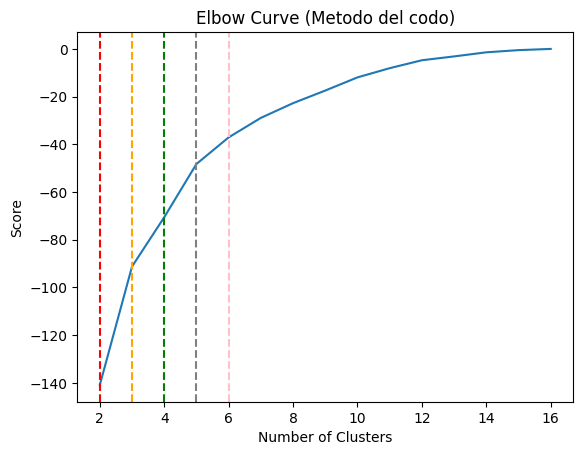

In [9]:
##
## Choose K
##
Nc = range(2, 17)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(X_esc).score(X_esc) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.axvline(x = 2, color='red', linestyle='--')
plt.axvline(x = 3, color='orange', linestyle='--')
plt.axvline(x = 4, color='green', linestyle='--')
plt.axvline(x = 5, color='gray', linestyle='--')
plt.axvline(x = 6, color='pink', linestyle='--')
plt.title('Elbow Curve (Metodo del codo)')
plt.show()

In [10]:
##
## Fit kmeans con K = 3
##
kmeans = KMeans(n_clusters = 3).fit(X_esc)

In [11]:
##
## Centroids
##
# centroids = kmeans.cluster_centers_
# print(centroids)

In [12]:
##
## Predicting the clusters and heatmap
##
df_g = pd.DataFrame(X_esc)
df_g['group'] = kmeans.predict(X_esc)

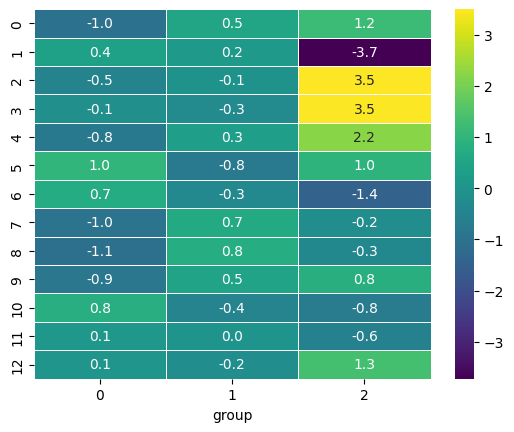

In [13]:
##
## Heatmap groups
##
heatmap_groups(df_g, "group", 1)

### Dendrograms

#### Using linkage

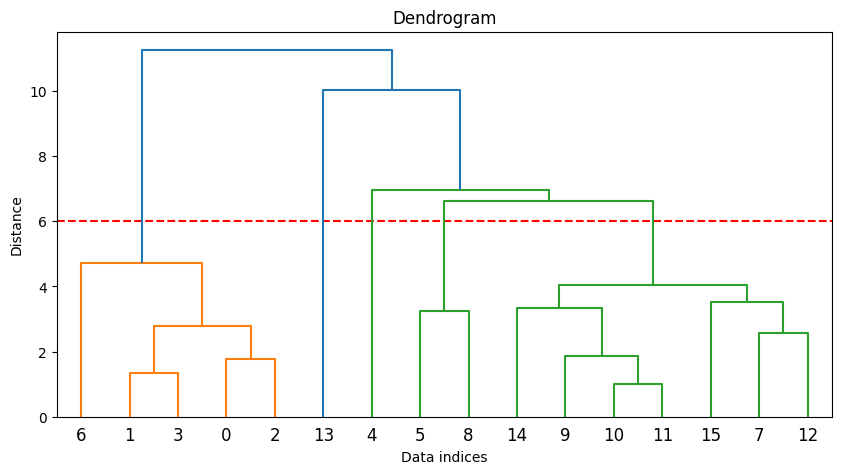

In [14]:
##
## Fit linkage
##
Z = linkage(X_esc, method='ward', metric='euclidean')

##
## View the dendrogram
##
plt.figure(figsize=(10, 5))
cutting_height = 6
plt.axhline(y=cutting_height, color='r', linestyle='--', label=f'Corte en {cutting_height}')
dendrogram_result = dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data indices')
plt.ylabel('Distance')
plt.show()

In [15]:
leaves_color_list = dendrogram_result['leaves_color_list']
leaves_order = dendrogram_result['leaves']

# Rearrange the DataFrame according to the order of the sheets
df_g = df_g.iloc[leaves_order].copy()
df_g['group2'] = leaves_color_list
df_g = df_g.sort_index()
df_g2 = df_g.copy()
df_g2 = df_g2.iloc[:, :13].join(df_g2.iloc[:, -1:])

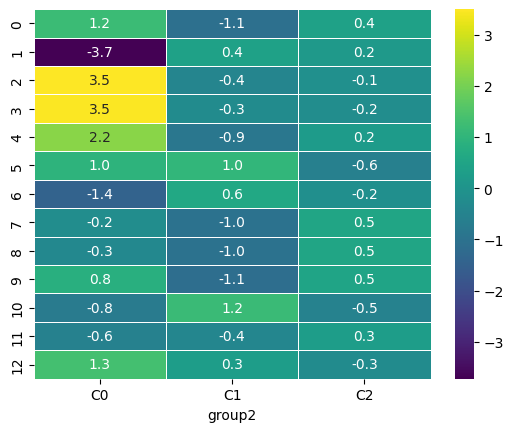

In [16]:
##
## Heatmap groups
##
heatmap_groups(df_g2, "group2", 1)

#### Using sklearn

In [17]:
agglomerativeClustering = AgglomerativeClustering(
    # -------------------------------------------------------------------------
    # The number of clusters to find.
    n_clusters = None,
    # -------------------------------------------------------------------------
    # "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is
    # "ward", only "euclidean" is accepted.
    affinity='euclidean',
    # -------------------------------------------------------------------------
    # {'ward', 'complete', 'average', 'single'}
    linkage='ward',
    # -------------------------------------------------------------------------
    # The linkage distance threshold above which, clusters will not be merged.
    distance_threshold=8,
)

agglomerativeClustering.fit(X_esc)

AgglomerativeClustering(affinity='euclidean', distance_threshold=8,
                        n_clusters=None)

In [18]:
print(agglomerativeClustering.n_clusters_)
print(agglomerativeClustering.labels_)
print(agglomerativeClustering.n_leaves_)

3
[1 1 1 1 0 0 1 0 0 0 0 0 0 2 0 0]
16


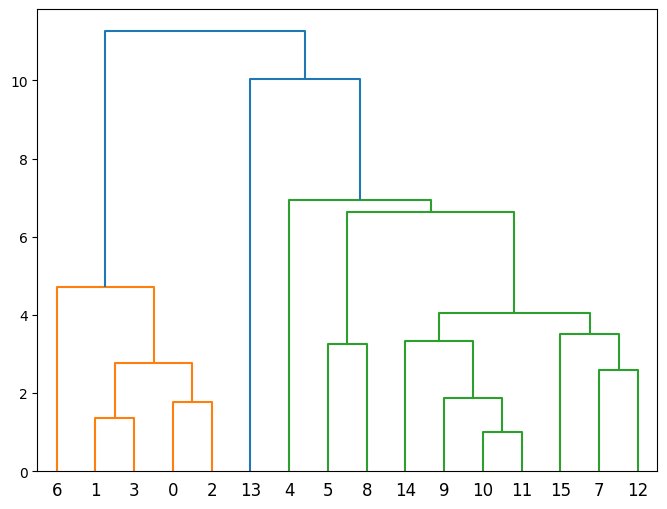

In [19]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(8,6))
plot_dendrogram(
    agglomerativeClustering,
    truncate_mode="level",
    p=11,
)

In [20]:
agglomerativeClustering = AgglomerativeClustering(
    # -------------------------------------------------------------------------
    # The number of clusters to find.
    n_clusters = 3,
    # -------------------------------------------------------------------------
    # "l1", "l2", "manhattan", "cosine", or "precomputed". If linkage is
    # "ward", only "euclidean" is accepted.
    affinity='euclidean',
    # -------------------------------------------------------------------------
    # {'ward', 'complete', 'average', 'single'}
    linkage='ward',
    # -------------------------------------------------------------------------
    # The linkage distance threshold above which, clusters will not be merged.
    distance_threshold=None,
)

agglomerativeClustering.fit(X_esc)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [21]:
print(agglomerativeClustering.n_clusters_)
print(agglomerativeClustering.labels_)
print(agglomerativeClustering.n_leaves_)

3
[1 1 1 1 0 0 1 0 0 0 0 0 0 2 0 0]
16


In [22]:
df_g['group3'] = agglomerativeClustering.labels_
df_g3 = df_g.copy()
df_g3 = df_g3.iloc[:, :13].join(df_g3.iloc[:, -1:])

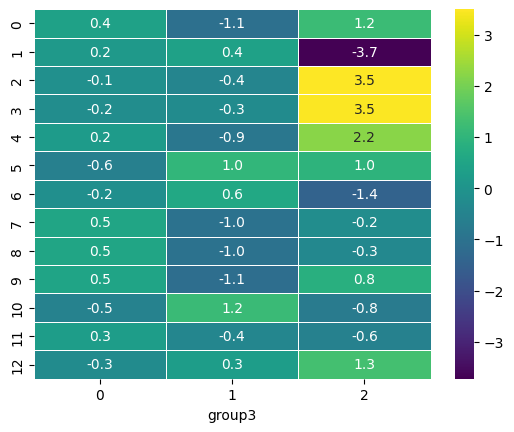

In [23]:
##
## Heatmap groups
##
heatmap_groups(df_g3, "group3", 1)

### Compare groups

Status: incomplete

In [26]:
df_g.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,group,group2,group3
0,-1.206045,0.610206,-1.001654,-0.396183,-1.425390,1.107423,0.268701,-0.897332,-0.867926,-2.676576,1.504860,-0.272404,0.917914,0,C1,1
1,-1.206045,0.458366,-1.021210,-0.648423,-1.036962,1.156979,0.490025,-1.016184,-0.867926,-1.270593,1.737570,-0.481946,-1.241883,0,C1,1
2,-1.206045,0.306526,-0.307405,-0.039060,-1.055459,1.156979,0.490025,-1.016184,-0.943153,-1.251065,1.667757,-0.272404,0.485954,0,C1,1
3,-1.206045,0.458366,-0.442778,-0.220932,-0.371087,1.132201,0.490025,-1.016184,-0.867926,-0.840987,1.225607,-0.481946,-0.593944,0,C1,1
4,-0.603023,0.154687,-0.175943,-0.117923,0.035837,-2.388758,-3.089892,3.001012,2.111045,0.760273,-0.892056,0.460992,-0.377964,1,C2,0


In [29]:
df_c = df_g.copy()
df_c = df_c.iloc[:, :13]

g1 = df_g['group']
g2 = df_g['group2']
g3 = df_g['group3']

In [24]:
print('ok_')

ok_
